In [2]:
%%HTML
<link rel="stylesheet" type="text/css" href="../custom.css">

# 応用計量分析２（第6回）

主成分分析





### 担当教員: 梶野 洸（かじの ひろし）


# 本日の目標

- 主成分分析（PCA）のアルゴリズムを導出する
- 主成分分析（PCA）を実装する

# 主成分分析, PCA

データ $x_1,\dots,x_N\in \mathbb{R}^D$ があったとき、その"特性"を保ったまま低次元表現を得たい。
- データを目で見たい（100次元だと見られないけど2次元なら）
- 同じ情報量ならば低次元の方が学習しやすい
- 特性の定義によって様々な手法がある
- $K~(<D)$次元表現を得る

# 主成分分析（1次元の場合）

Q. データを1次元に射影するとき、どのように射影すれば一番データの特性を保存できるか？

A. データの分散が最も大きくなる軸に射影すれば良さそう
<img src="figs/pca_variance.png" width=500px>

# 主成分分析（1次元の場合）の定式化

- $X = \begin{bmatrix} x_1 & x_2 & \dots & x_N \end{bmatrix}^\top$
    - データの平均を $\bar{x}=\frac{1}{N}\sum_{n=1}^N x_n$ とする
- $u_1\in\mathbb{R}^D$ で定められる軸に射影することを考える
    - $u_1^\top u_1=1$ とする
- $u_1$ で定められる軸上での $x_n$ の座標は $u_1^\top x_n$
- $u_1$ で定められる軸上での $X$ の分散は $\frac{1}{N}\sum_{n=1}^N (u_1^\top x_n - u_1^\top \bar{x})^2$
<img src="figs/pca_projection.png" width=500px>

# 主成分分析（1次元の場合）の定式化

分散が最大になる方向が知りたいので、以下の最適化問題を解く
$$
\mathrm{maximize}_{u_1\in\mathbb{R}^D} \frac{1}{N}\sum_{n=1}^N (u_1^\top x_n - u_1^\top \bar{x})^2\\
\mathrm{subject\ to}\ u_1^\top u_1=1
$$

# 主成分分析（1次元の場合）の解法

まず目的関数を書き換える

\begin{align}
\frac{1}{N}\sum_{n=1}^N (u_1^\top x_n - u_1^\top \bar{x})^2 &= \frac{1}{N}\sum_{n=1}^N u_1^\top(x_n - \bar{x}) (x_n - \bar{x})^\top u_1\\
&=u_1^\top \Sigma u_1
\end{align}
where $\Sigma = \frac{1}{N} \sum_{n=1}^N (x_n - \bar{x}) (x_n - \bar{x})^\top$.

すると最適化問題は以下のように書き換わる

$$
\mathrm{maximize}_{u_1\in\mathbb{R}^D} u_1^\top \Sigma u_1\\
\mathrm{subject\ to}\ u_1^\top u_1=1
$$

# 主成分分析（1次元の場合）の解法
ラグランジュ未定乗数法を使う。ラグランジアンは
\begin{align}
\mathcal{L}(u_1; \lambda_1) = u_1^\top \Sigma u_1 + \lambda_1 (1 - u_1^\top u_1)
\end{align}

最適解 $u_1^\star$ で停留点になっていることが必要なので、
\begin{align}
\dfrac{\partial}{\partial u_1} \mathcal{L}(u_1^\star; \lambda_1) = \Sigma u_1^\star - \lambda_1 u_1^\star = 0
\end{align}
つまり $\lambda_1$ は $\Sigma$ の固有値で $u_1^\star$ はそれに対応する（単位）固有ベクトルであることが必要。また目的関数は
\begin{align}
u_1^\top \Sigma u_1 = \lambda_1
\end{align}
となるため、$\lambda_1$ は $\Sigma$ の最大固有値で、$u_1^\star$ は最大固有値に対応する長さ1の固有ベクトルである。

# 主成分分析（2次元以上）について

- 第一主成分は分散共分散行列 $\Sigma$ の最大固有値に対応する固有ベクトルだった。
- Q. データを $K (\geq 2)$ 次元に落としたい場合はどうすればいいのか？
- A. $K$ 次元空間に落とした時の分散を考えれば良さそう
    - $\Sigma$ の固有値の大きい方から $K$ 個とってきて、対応する固有ベクトルも持ってくる: $\{(\lambda_k, u_k)\}_{k=1}^K$
    - $U=\begin{bmatrix}u_1 \dots u_K\end{bmatrix}^\top \in\mathbb{R}^{K\times D}$ として、 $U$ で $K$ 次元空間に射影したらいい
    - 証明略

# データの再構成
- $D$次元ベクトル $x$ を $K$ 次元ベクトル $z$ に変換した
- $z$ から $x$ に戻せる？→情報は落ちるけどできなくはない
<img src="figs/decode.png" width=800px>

# アルゴリズム

- 入力: $x_1,\dots, x_N\in\mathbb{R}^D$, $K\in\mathbb{N}$
- 出力: $z_1,\dots, z_N\in\mathbb{R}^K$


1. $\bar{x}=\frac{1}{N}\sum_{n=1}^N x_n$
1. $\Sigma=\frac{1}{N}\sum_{n=1}^N (x_n-\bar{x}) (x_n-\bar{x})^\top$
1. $\Sigma$ の固有値と対応する固有ベクトル $(\lambda_1, u_1),\dots,(\lambda_D, u_D)$ を求める（$\lambda_1\geq\cdots\geq \lambda_D$）
    - ただし $\|u_d\|=1$ for all $d=1,\dots,D$.
1. $U=\begin{bmatrix}u_1 \dots u_K\end{bmatrix}^\top$ として、$z_n=Ux_n$ を計算

# ここまでのまとめ

- PCA は分散共分散行列を固有値分解すればできる
- 固有値（＋固有ベクトルも）の大きい方から順番にとってくればいい

# 演習4.3

1.  $X=\begin{bmatrix}x_1 & x_2 &\dots & x_N\end{bmatrix}^\top$ を入力として、$\Sigma = \frac{1}{N} \sum_{n=1}^N (x_n - \mu) (x_n - \mu)^\top$ を出力する関数 `covariance` を完成させよ。ただし $\mu=\frac{1}{N}\sum_{n=1}^N x_n$ とし、入出力形式は以下の通りとする。
    - 入力: N x D の `numpy.ndarray` （N: サンプルサイズ、D: 次元）
    - 出力: D x D の `numpy.ndarray`

1. 対称行列 A を入力とし、その固有値からなる `numpy.ndarray` と対応する固有ベクトルからなる `numpy.ndarray` を返す関数 `eig` を完成させよ。ただし入出力は以下の通りとする。
   - 入力: D x D の `numpy.ndarray`
   - 出力:
     - `eig_val_array`: 長さD の `numpy.ndarray` で、 A の固有値が昇順に並んでいる（小さい固有値がはじめ、大きい固有値が後ろ）。
     - `eig_vec_array`: D x D の `numpy.ndarray` で、A の固有ベクトルからなる。 `eig_vec_array[:, i]` は `eig_val_array[i]` に対応する長さ1の固有ベクトル。

1. PCA を実行する関数を完成させよ
   - 入力
     - `X`: N x D の `numpy.ndarray` （N: サンプルサイズ、D: 次元）
     - `K`: 1 以上D以下の `int`
   - 出力
     - `Z`: N x K の `numpy.ndarray` （`Z[n, :]`は、PCAを用いて`X[n, :]`をK次元に落としたもの）
     - `U`: K x D の `numpy.ndarray` （PCAで次元圧縮するときに用いる、D次元ベクトルをK次元ベクトルに変換する行列）

# PCA の実装

- PCA でデータを2次元で見てみる
- 主成分を見てみる
- 再構成してみる

→ 見て楽しいので画像データを使ってみる

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# データを取得
dataset = fetch_olivetti_faces()
num_examples, row_size, col_size = dataset['images'].shape
X = dataset['data']
print(X)

# 平均0にしておく
X_mean = X.mean(axis=0)
X_centered = X - X_mean

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


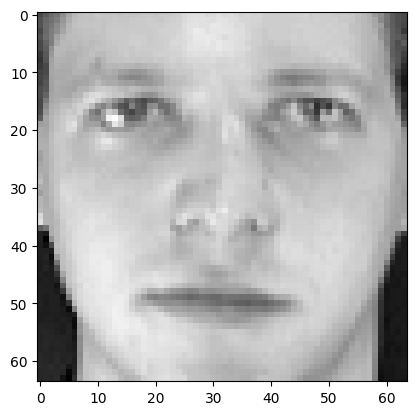

(400, 4096)

In [9]:
# 顔データを表示してみる
plt.imshow(dataset['images'][0], cmap=plt.cm.gray)
plt.show()
X_centered.shape

<img src="figs/img2vec.png" width=500px>

# 演習4.3の解答的なもの

上で定義した `X_centered` に対してPCAのアルゴリズムを適用した時に得られる低次元表現 $Z\in\mathbb{R}^{N\times K}$ と変換に用いる行列 $U\in\mathbb{R}^{K\times D}$ を求めるプログラムを書く


1. $\Sigma=\sum_{n=1}^N x_n x_n^\top$ を計算せよ（$x_n$ の平均は0に変換済み）
1. $\Sigma$ の固有値と対応する固有ベクトル $(\lambda_1, u_1),\dots,(\lambda_D, u_D)$ を計算せよ（$\lambda_1\geq\cdots\geq \lambda_D$）
    - ヒント: 対称行列の固有値分解を行う関数 https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
1. $U=\begin{bmatrix}u_1 \dots u_K\end{bmatrix}^\top$ として、$z_n=Ux_n$ を計算せよ
    - 例えば $K=20$

1. $\Sigma=\sum_{n=1}^N x_n x_n^\top$ を計算せよ

In [ ]:
sample_size = X_centered.shape[0]
dim = X_centered.shape[1]

# 定義通り地道に sigma を作ってもいい
sigma = np.zeros((dim, dim))
for each_example in range(sample_size):
    sigma = sigma + np.outer(X_centered[each_example], X_centered[each_example])

$X = \begin{bmatrix}x_1 \dots, x_N\end{bmatrix}^\top$ としたとき、

$$
X^\top X = \sum_{n=1}^N x_n x_n^\top
$$

という関係を使ってもいい（こっちの方が圧倒的に速い）

In [ ]:
# sigma には上で計算したものが入っている
print(np.linalg.norm(sigma - X_centered.T @ X_centered))

2. $A$ の固有値と対応する固有ベクトル $(\lambda_1, u_1),\dots,(\lambda_D, u_D)$ を計算せよ（$\lambda_1\geq\cdots\geq \lambda_D$）

In [ ]:
from numpy.linalg import eigh
eig_val, eig_vec = eigh(sigma)
print(eig_val)
print(eig_vec.shape)

3. $U=\begin{bmatrix}u_1 \dots u_K\end{bmatrix}^\top$ として、$z_n=Ux_n$ を計算せよ

In [ ]:
K = 20
U = eig_vec[:, -K:].T
print(U.shape)
z = (U @ X.T).T
print(z.shape)

# 演習
PCA を実行する関数を書け

- 入力: データ $X\in\mathbb{R}^{N\times D}$, 次元 $K$
- 出力: 変換されたデータ $Z\in\mathbb{R}^{N\times K}$, 変換にもちいる線形変換 $U\in\mathbb{R}^{K\times D}$

In [10]:
from numpy.linalg import eigh
def pca(X, K):
    X = X - np.mean(X, axis=0)
    sigma = X.T @ X
    eig_val, eig_vec = eigh(sigma)
    U = eig_vec[:, -K:].T
    z = (U @ X.T).T
    return z, U

In [11]:
# pca を実行
K=20
z, U = pca(X_centered, K)
print(z.shape, U.shape)

(400, 20) (20, 4096)


In [12]:
# V の行ベクトルが正規直交基底であることを確認
print('distance from the identity:', np.abs(U @ U.T - np.identity(K)).max())
print('mean reconstruction loss: ',((X_centered - (U.T @ z.T).T) * (X_centered - (U.T @ z.T).T)).mean())

distance from the identity: 1.5366822481155396e-07
mean reconstruction loss:  0.0045594834


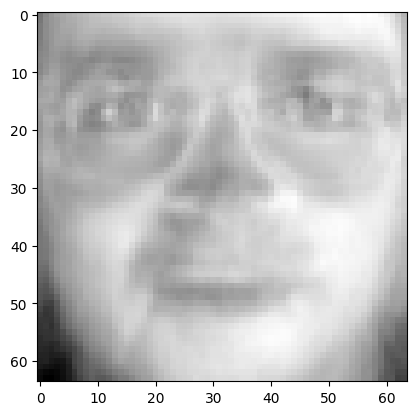

In [21]:
# データの貼る空間の固有ベクトルを見てみる
plt.imshow(-U[-1].reshape(row_size, col_size), cmap=plt.cm.gray)
plt.show()

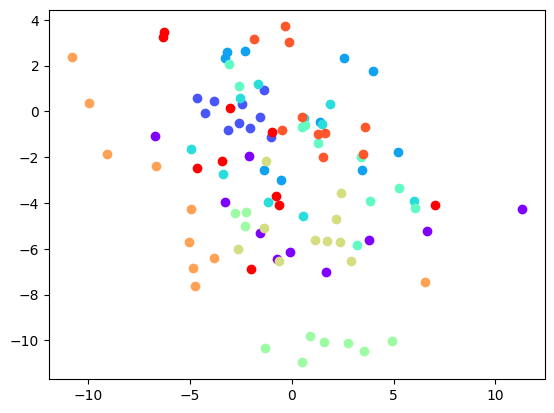

In [22]:
# この場合は2次元に落としてもよくわからない...
import matplotlib.cm as cm
import numpy as np

K = 2
z, U = pca(X_centered, K)

colors = cm.rainbow(np.linspace(0, 1, 10))
for each_idx in range(100):
    plt.scatter(z[each_idx, 0], z[each_idx, 1], color=colors[dataset['target'][each_idx]])
plt.show()

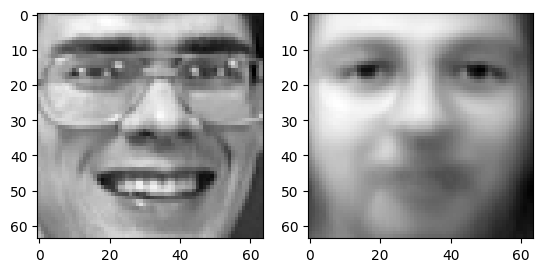

In [23]:
# 再構成 (K=2)
K = 2
z, U = pca(X_centered, K)
X_rec = (U.T @ z.T).T + X_mean
idx = 190

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dataset['images'][idx], cmap=plt.cm.gray) # 左が元の画像
ax2.imshow(X_rec[idx].reshape(row_size, col_size), cmap=plt.cm.gray) # 右が再構成画像
plt.show()

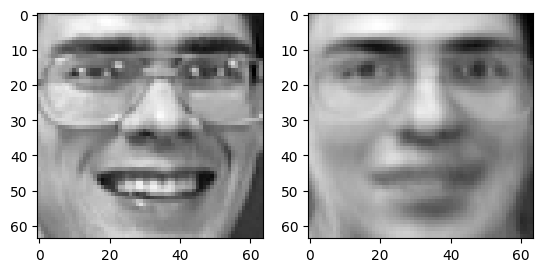

In [24]:
# 再構成 (K=20)
K = 20
z, U = pca(X_centered, K)
X_rec = (U.T @ z.T).T + X_mean
idx = 190

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dataset['images'][idx], cmap=plt.cm.gray) # 左が元の画像
ax2.imshow(X_rec[idx].reshape(row_size, col_size), cmap=plt.cm.gray) # 右が再構成画像
plt.show()

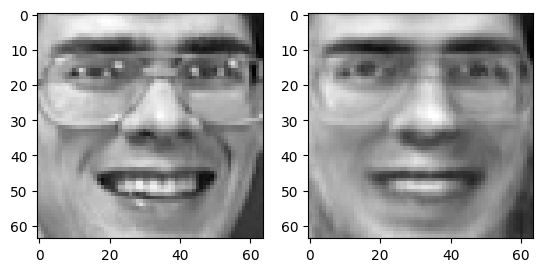

In [25]:
# 再構成 (K=50)
K = 50
z, U = pca(X_centered, K)
X_rec = (U.T @ z.T).T + X_mean
idx = 190

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dataset['images'][idx], cmap=plt.cm.gray) # 左が元の画像
ax2.imshow(X_rec[idx].reshape(row_size, col_size), cmap=plt.cm.gray) # 右が再構成画像
plt.show()

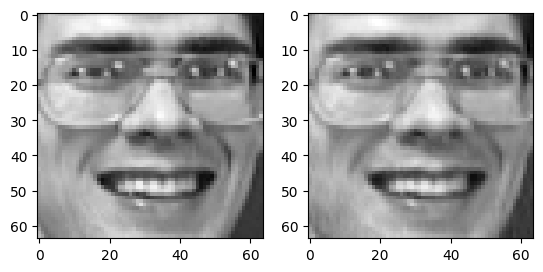

In [26]:
# 再構成 (K=200)
K = 200
z, U = pca(X_centered, K)
X_rec = (U.T @ z.T).T + X_mean
idx = 190

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dataset['images'][idx], cmap=plt.cm.gray) # 左が元の画像
ax2.imshow(X_rec[idx].reshape(row_size, col_size), cmap=plt.cm.gray) # 右が再構成画像
plt.show()

# まとめ

- 行列、ベクトルは `numpy` を使って実装する
- 線形代数の操作は `numpy` の API を探せば実装されていることが多い
- 主成分分析(principle component analysis; PCA) を実装した
    - データを低次元空間に射影するアルゴリズム
    - 低次元空間での分散を最大化する
    - 固有値分解に帰着される

# 以下、2020年の講義では用いない資料

# PCA をオートエンコーダとして導出する

- 分散最大化として定式化されることが多いが、なぜ分散最大化したいのかがわからない人もいるかもしれない？
- 他の説明を試みることでより納得できるようにしたい
- 以下説明したいこと
    - オートエンコーダとは？
    - PCA のオートエンコーダ的な解釈は？

# オートエンコーダ

- 入力: データ $x_1,\dots,x_N\in\mathbb{R}^D$
- 出力: エンコーダ $\mathrm{Enc}\colon \mathbb{R}^D\rightarrow\mathbb{R}^K$ とデコーダ $\mathrm{Dec}\colon \mathbb{R}^K\rightarrow\mathbb{R}^D$ で、 $\mathrm{Dec}(\mathrm{Enc}(x_n))\approx x_n$ ($n=1,\dots,N$) となるもの
    - 元に戻せるならばいいエンコーダ、デコーダっぽい気がする
    - エンコーダを使うとデータ$x\in\mathbb{R}^D$の低次元表現$z\in\mathbb{R}^K$が得られる
    - $\mathrm{Enc}$, $\mathrm{Dec}$ をニューラルネットワークで作るのが流行りの技術

<img src="figs/autoencoder.png" width=500px>

# PCA は、$\mathrm{Enc}$, $\mathrm{Dec}$ を線形変換でモデル化したもの

- エンコーダ $W\in\mathbb{R}^{K\times D}$ は $\mathbb{R}^D\rightarrow\mathbb{R}^K$ という関数としてみることもできる
- $U\in\mathbb{R}^{K\times D}$ を用いて定めるデコーダ $U^\top$ は $\mathbb{R}^K\rightarrow\mathbb{R}^D$ という関数としてみることもできる
    - エンコード: $z = Wx$ 
    - デコード: $\hat{x} = U^\top z = U^\top W x$
    - $\hat{x}\approx x$ となってほしい
    
<img src="figs/pca.png" width=500px>

# 定式化
- $X = \begin{bmatrix} x_1 & x_2 & \dots & x_N \end{bmatrix}^\top$
- 平均$0$であるとする: $\sum_{n=1}^N x_n = 0$
- 以下を満たす $W, U$ を求める

$$
\min_{W, U\in\mathbb{R}^{K\times D}} \sum_{n=1}^{N}\|x_n - U^{\top}Wx_n\|_{2}^2 \tag{1}
$$

# ここからの流れ

**補題1** エンコーダ、デコーダをモデル化するのに $W$, $U$ の二つのパラメタを用意していたが、実は $V\in\mathbb{R}^{K\times D}$ such that $VV^\top=I$ となるパラメタ一つで十分（エンコーダが $V$, デコーダが $V^\top$）

**補題2** 目的関数はトレースを用いて綺麗にかける

**補題3** 最大化したい目的関数の上界を求めることができる

**定理** 固有値・固有ベクトルを用いて解を構成すると目的関数の上界を達成できる。これは最適解（の一つ）が求まったことを示している。

## 補題1

式(1)の最適値は

$$
\begin{align}
\min_{V\in\mathbb{R}^{K\times D},\ VV^\top=I} \sum_{n=1}^{N}\|x_n - V^{\top}Vx_n\|_{2}^2\tag{2}
\end{align}
$$

の最適値と等しい

## 証明
- $R = \{U^\top W x \mid x \in \mathbb{R}^D\}$ とすると、$R$は$\mathbb{R}^D$中の$K$次元線型部分空間
- $R$ の正規直交基底を$V=\begin{bmatrix}v_1 & \dots & v_K\end{bmatrix}^\top\in\mathbb{R}^{D\times K}$とする。
- $V^\top Vx = \arg\min_{\tilde{x}\in R} \|x - \tilde{x}\|$が成り立つ。
    - $R$ の元は $y\in\mathbb{R}^K$ を用いて $V^\top y$ と書けることを利用して示す（演習）
- 式(1)の最適解 $U^\star$, $W^\star$ と、それに対応する $R^\star$, $V^\star$ を持ってくると、
$$
\begin{align}
\|x_n - {U^\star}^\top W^\star x_n\|^2 \geq \min_{\tilde{x}_n\in R^\star}\|x_n - \tilde{x}_n\|^2 = \|x_n - {V^\star}^\top V^\star x_n\|^2
\end{align}
$$
    - 一つめの不等式は、${U^\star}^\top W^\star x_n \in R^\star$ だから成立
    - 二つめの不等式は、上の議論より成立
- 上の不等式は、 $V^\star$ は、最適解 $U^\star, W^\star$ と等しいかより小さい目的関数値を達成する、と言っている
- より小さい目的関数値を達成することはあり得ないので、上の不等式は等号成立

# 補題2
最適化問題(2)は
$$
\max_{V\in\mathbb{R}^{K\times D}, VV^\top=I}\mathrm{tr}\left(V \left(\sum_{n=1}^N x_n x_n^\top\right)V^\top\right) \tag{3}
$$
と同値。

# 証明

展開すれば良い。

$$
\sum_{n=1}^N \|x_n - V^\top V x_n\|^2 = \sum_{n=1}^N \|x_n\|^2 - 2\sum_{n=1}^N x_n^\top V^\top V X_n + \sum_{n=1}^N x_n^\top V^\top V V^\top V x_n
$$

$$
=\sum_{n=1}^N \|x_n\|^2 - \sum_{n=1}^N x_n^\top V^\top V x_n
$$

第二項は、

$$
\begin{align}
\sum_{n=1}^N x_n^\top V^\top V x_n = \sum_{n=1}^N \mathrm{tr}(x_n^\top V^\top V x_n)
=  \sum_{n=1}^N \mathrm{tr}(x_n x_n^\top V^\top V) \\
= \mathrm{tr}\left(\left(\sum_{n=1}^N x_n x_n^\top\right) V^\top V\right)
= \mathrm{tr}\left(V\left(\sum_{n=1}^N x_n x_n^\top\right) V^\top\right)
\end{align}
$$

# 補題3
$A=\sum_{n=1}^N x_n x_n^\top$ として、その固有値、固有ベクトルを $\lambda_1,\dots, \lambda_D$, $u_1,\dots,u_D$ とする（$\lambda_1\geq\lambda_2\geq\cdots\geq\lambda_D$）。
この時任意の $V\in\mathbb{R}^{K\times D}, VV^\top=I$ について

$$
\mathrm{tr}\left(V A V^\top\right) \leq \max_{w\in[0,1]^D, \sum_{d=1}^D w_d\leq K}\sum_{d=1}^D \lambda_d w_d = \sum_{d=1}^K \lambda_d
$$

が成立

# 証明
$A=U^\top \Lambda U$ と固有値分解できる（$U\in\mathbb{R}^{D\times D}$）。
$V\in\mathbb{R}^{K\times D}, VV^\top = I$ を一つ持ってくる。

$W=VU^\top\in\mathbb{R}^{K\times D}$と置くと、
- $VAV^\top = VU^\top\Lambda U V^\top = W\Lambda W^\top$.
- $W$ の各行は$D$次元空間の正規直交基底: $WW^\top = UV^\top VU^\top = I$

$$
\begin{align}
\mathrm{tr}(W\Lambda W^\top) = \sum_{d=1}^D \lambda_d \sum_{k=1}^Kw_{k,d}^2
\end{align}
$$

$w_d:=\sum_{k=1}^K w_{k,d}^2$ と置くと、

$$
\begin{align}
\mathrm{tr}(W\Lambda W^\top) &= \sum_{d=1}^D \lambda_d \sum_{k=1}^Kw_{k,d}^2\\
&= \sum_{d=1}^D \lambda_d w_d
\end{align}
$$

ここで $0\leq\sum_{k=1}^K w_{k,d}^2 \leq 1~(d=1,\dots,D)$, $\sum_{d=1}^D \sum_{k=1}^K w_{k,d}^2=K$ なので、

$$
\begin{align}
\mathrm{tr}(W\Lambda W^\top) &= \sum_{d=1}^D \lambda_d w_d\\
&\leq \max_{w_d\in[0,1], \sum_{d=1}^D w_d\leq K}\sum_{d=1}^D \lambda_d w_d
\end{align}
$$
が成立。


# 定理
$A=\sum_{n=1}^N x_n x_n^\top$ として、その固有値、固有ベクトルを $\lambda_1,\dots, \lambda_D$, $u_1,\dots,u_D$ とする（$\lambda_1\geq\lambda_2\geq\cdots\geq\lambda_D$）。

この時 $V = \begin{bmatrix}u_1 \dots u_K\end{bmatrix}^\top$ が最適化問題(2), (3)の解

# 証明

$$
\mathrm{tr}(VAV^\top) = \mathrm{tr}(VU^\top \Lambda UV^\top) = \mathrm{tr}(\mathbb{1}_K \Lambda \mathbb{1}_K) = \sum_{d=1}^K \lambda_d
$$
が成り立つ。ここで
$$
[\mathbb{1}_K]_{i,j} =
\begin{cases}
\delta_{i,j} &\text{ if } i=j\leq K\\
0 & \text{otherwise}.
\end{cases}
$$

補題3より、これは最適値。